# **Data Processing**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Scripts installing the packages for the Openface packages.

In [ ]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_operations/mat_operations.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/core/mat_the_basic_image_container/mat_the_basic_image_container.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_match.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/planar_tracking.cpp  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/stats.h  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/AKAZE_tracking/utils.h  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/Homography/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/features2D/Homogra

Import Dependencies

In [ ]:
# package from https://numpy.org/
import numpy as np
# package from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
import pandas as pd
import os

from IPython.display import YouTubeVideo

In [ ]:
# change your iloc index and file name HERE!
startIdx = 41
endIdx = 76
df = pd.read_csv('Cmpt_419.csv').iloc[startIdx:endIdx]
df


file_name  \
41  Strangers_Play_Never_Have_I_Ever_on_a_Blind_Da...   
42  Strangers_Play_Never_Have_I_Ever_on_a_Blind_Da...   
43                     How_to_Define_Relationship.mp4   
44                                           rudy.mp4   
45                                 50_First_Dates.mp4   
46                                 50_First_Dates.mp4   
47                               irelandFirstLove.mp4   
48                               irelandFirstLove.mp4   
49                                 Gwen_and_Peter.mp4   
50                                   Love_Scenery.mp4   
51                                    Lie_to_Love.mp4   
52                         The_Oath_of_Love_Clip1.mp4   
53                         The_Oath_of_Love_Clip1.mp4   
54                         The_Oath_of_Love_Clip1.mp4   
55                                    flirty_girl.mp4   
56                                      tuxedoman.mp4   
57                                    Kobe_&_Shaq.mp4   
58                                    Kobe_&_Shaq.mp4   
59                                    Kobe_&_Shaq.mp4   
60  Roommates_Play_An_Honest_Game_Of_Never_Have_I_...   
61  Roommates_Play_An_Honest_Game_Of_Never_Have_I_...   
62  Roommates_Play_An_Honest_Game_Of_Never_Have_I_...   
63                        Ross_and_Chandler_women.mp4   
64                                       angryman.mp4   
65                                         2women.mp4   
66                                   Chungha_Eric.mp4   
67                         GeniusBrain_w_David_So.mp4   
68                         GeniusBrain_w_David_So.mp4   
69                               Off_The_Pill_#14.mp4   
70                       Off_The_Pill_Podcast_#22.mp4   
71                       Off_The_Pill_Podcast_#22.mp4   
72                     Ashley_Choi_on_Life_Before.mp4   
73                       Off_The_Pill_Podcast_#41.mp4   
74                                    notflirtMan.mp4   
75                                      blankFace.mp4   

                                        youtube_links  \
41  https://www.youtube.com/watch?v=2kVgU57si4A&ab...   
42  https://www.youtube.com/watch?v=2kVgU57si4A&ab...   
43  https://www.youtube.com/watch?v=oMYstN63E6I&ab...   
44  https://www.youtube.com/watch?v=3k6RD9zVvpE&ab...   
45  https://www.youtube.com/watch?v=CBu8I1ByeAk&ab...   
46  https://www.youtube.com/watch?v=CBu8I1ByeAk&ab...   
47  https://www.youtube.com/watch?v=5js7XDmMvXM&ab...   
48  https://www.youtube.com/watch?v=5js7XDmMvXM&ab...   
49  https://www.youtube.com/watch?v=VGbTWLW2wTA&ab...   
50  https://www.youtube.com/watch?v=4K4-V9ers0g&ab...   
51  https://www.youtube.com/watch?v=be1geW3fhDY&ab...   
52  https://www.youtube.com/watch?v=rxAOyXniQpk&ab...   
53  https://www.youtube.com/watch?v=U2vB-duma4c&ab...   
54  https://www.youtube.com/watch?v=hr_XlUfflw8&ab...   
55                                                NaN   
56                                                NaN   
57  https://www.youtube.com/watch?v=PgoXlm39dvg&ab...   
58  https://www.youtube.com/watch?v=PgoXlm39dvg&ab...   
59  https://www.youtube.com/watch?v=PgoXlm39dvg&ab...   
60  https://www.youtube.com/watch?v=vhKTK5T6VMY&ab...   
61  https://www.youtube.com/watch?v=vhKTK5T6VMY&ab...   
62  https://www.youtube.com/watch?v=vhKTK5T6VMY&ab...   
63  https://www.youtube.com/watch?v=U4VGFIJb06I&ab...   
64                                                NaN   
65                                                NaN   
66  https://www.youtube.com/watch?v=pxaadXUBPr8&ab...   
67  https://www.youtube.com/watch?v=qZPOP664KzI&ab...   
68  https://www.youtube.com/watch?v=qZPOP664KzI&ab...   
69  https://www.youtube.com/watch?v=hO_SzV6DaD0&ab...   
70  https://www.youtube.com/watch?v=AWBEG0aQRZA&li...   
71  https://www.youtube.com/watch?v=AWBEG0aQRZA&li...   
72  https://www.youtube.com/watch?v=DswNOh4BR84&ab...   
73  https://www.youtube.com/watch?v=h9S2ZY7qVL4&ab...   
74                                                NaN



Given mp4 video files, trim the videos on determined time stamps and run OpenFace to extract the AUs from the faces.



In [ ]:
import time
newDf = pd.DataFrame()

def receiveRowValue(row, dataRowInfo): return dataRowInfo 

def generateFaceId(row, idMap):
  generatedId = idMap[row['face_id']]
  return generatedId

newId = 0
usedIds = set([])

def createIdMap(df):
  global newId
  idMap = {}
  uniqueIds = np.unique(df['face_id'])
  for id in uniqueIds:
    if (id in usedIds):
      idMap[id] = newId
    else:
      idMap[id] = id
    newId+=1
    usedIds.add(id)
    usedIds.add(newId)
  return idMap

for linkId in range(len(df)):
  data_row = df.iloc[linkId]
  video_name = data_row['file_name']
  time_stamps = data_row['time_stamp']
  video_type = data_row['video_type']
  # # download the youtube with the given ID
  # CHANGE THIS LINE IF NECESSARY
  video = "drive/MyDrive/CMPT419Project/" + video_name
  
  # # # Eliminate_Your_Date_with_One_Press_of_a_Button_The_Button_Cut.mp4

  !rm -rf video.mp4
  # # # # cut the first 5 seconds
  print(video_name)
  if (video_type == 'clip'):
    start = time_stamps.split()[0]
    end = time_stamps.split()[2]
    !ffmpeg -y -loglevel info -ss {start} -i {video} -c copy -t {end} video.mp4
    # # clear any previous outputs.
    !rm -rf processed
      # # detect poses on the these 10 seconds.
    !./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
      # # convert the result into MP4

  else:
    # # clear any previous outputs.
    !rm -rf processed
      # # detect poses on the these 10 seconds.
    !./OpenFace/build/bin/FaceLandmarkVidMulti -f {video} -out_dir processed
      # # convert the result into MP4
  
  !ffmpeg -y -loglevel info -i processed/video.avi output.mp4
  
  if (len(newDf) <= 0):
    if (video_type == 'clip'):
      newDf = pd.read_csv('processed/video.csv')
    else:
      video_header = video_name.replace('.mp4', '')
      newDf = pd.read_csv('processed/' + video_header + '.csv')
    mapIds = createIdMap(newDf)
    newDf['agreement'] = newDf.apply(receiveRowValue, axis=1, args=(data_row['agreement'],))
    newDf['file_name'] = newDf.apply(receiveRowValue, axis=1, args=(data_row['file_name'],))
    newDf['flirting'] = newDf.apply(receiveRowValue, axis=1, args=(data_row['flirting'],))
    newDf['video_type'] = newDf.apply(receiveRowValue, axis=1, args=(data_row['video_type'],))
    newDf['new_face_id'] = newDf.apply(generateFaceId, axis=1, args=(mapIds,))


  else:
    currentVidDf = None
    if (video_type == 'clip'):
      currentVidDf = pd.read_csv('processed/video.csv')
    else: 
      video_header = video_name.replace('.mp4', '')
      currentVidDf = pd.read_csv('processed/' + video_header + '.csv')
    mapIds = createIdMap(currentVidDf)

    currentVidDf['agreement'] = currentVidDf.apply(receiveRowValue, axis=1, args=(data_row['agreement'],))
    currentVidDf['file_name'] = currentVidDf.apply(receiveRowValue, axis=1, args=(data_row['file_name'],))
    currentVidDf['flirting'] = currentVidDf.apply(receiveRowValue, axis=1, args=(data_row['flirting'],))
    currentVidDf['video_type'] = currentVidDf.apply(receiveRowValue, axis=1, args=(data_row['video_type'],))
    currentVidDf['new_face_id'] = currentVidDf.apply(generateFaceId, axis=1, args=(mapIds,))
    newDf = pd.concat([newDf, currentVidDf], axis=0)
    

Strangers_Play_Never_Have_I_Ever_on_a_Blind_Date.mp4
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-l

FileNotFoundError: ignored

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [ ]:
newDf.to_csv('output.csv')
newDf

frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
0        1        0      0.000        0.77        1 -0.086590  0.337153   
1        2        0      0.017        0.77        1 -0.076381  0.373328   
2        3        0      0.033        0.77        1 -0.103403  0.329152   
3        4        0      0.050        0.77        1 -0.105011  0.285830   
4        5        0      0.067        0.03        0  0.000000  0.000000   
..     ...      ...        ...         ...      ...       ...       ...   
878    801        0     13.333        0.88        1 -0.345994  0.186311   
879    802        0     13.350        0.88        1 -0.336763  0.182607   
880    803        0     13.367        0.98        1 -0.318669  0.168963   
881    804        0     13.383        0.88        1 -0.312108  0.165713   
882    805        0     13.400        0.88        1 -0.279829  0.115503   

     gaze_0_z  gaze_1_x  gaze_1_y  ...  AU23_c  AU25_c  AU26_c  AU28_c  \
0   -0.937459 -0.247910  0.338861  ...     0.0     1.0     0.0     0.0   
1   -0.924550 -0.237535  0.376032  ...     0.0     1.0     0.0     0.0   
2   -0.938598 -0.246003  0.331989  ...     1.0     1.0     0.0     1.0   
3   -0.952509 -0.232663  0.294766  ...     1.0     1.0     1.0     1.0   
4    0.000000  0.000000  0.000000  ...     1.0     1.0     0.0     1.0   
..        ...       ...       ...  ...     ...     ...     ...     ...   
878 -0.919552 -0.377381  0.221534  ...     0.0     1.0     1.0     0.0   
879 -0.923713 -0.372773  0.223544  ...     0.0     1.0     1.0     0.0   
880 -0.932685 -0.370415  0.224228  ...     0.0     0.0     1.0     0.0   
881 -0.935483 -0.366810  0.229807  ...     0.0     0.0     1.0     0.0   
882 -0.953076 -0.360206  0.201790  ...     0.0     0.0     1.0     0.0   

     AU45_c  agreement            file_name  flirting  video_type  new_face_id  
0       0.0        1.0        cam-flirt.mp4         T        full            0  
1       0.0        1.0        cam-flirt.mp4         T        full            0  
2       1.0        1.0        cam-flirt.mp4         T        full            0  
3       1.0        1.0        cam-flirt.mp4         T        full            0  
4       1.0        1.0        cam-flirt.mp4         T        full            0  
..      ...        ...                  ...       ...         ...          ...  
878     1.0        1.0  harry-francesca.mp4         T        full           51  
879     1.0        1.0  harry-francesca.mp4         T        full           51  
880     1.0        1.0  harry-francesca.mp4         T        full           51  
881     1.0        1.0  harry-francesca.mp4         T        full           51  
882     1.0        1.0  harry-francesca.mp4         T        full           51  

[9637 rows x 719 columns]

**Data Preprocessing**

In [ ]:
# Used for concating our different csvs together /*TODO DELETE This section when submitting*/ 

from pandas.io.formats.style_render import Subset
df1 = pd.read_csv('grace_output.csv').drop(columns=['new_face_id'])
df2 = pd.read_csv('grace_output2.csv').drop(columns=['new_face_id'])
df3 = pd.read_csv('joce_output.csv').drop(columns=['new_face_id'])
df4 = pd.read_csv('jocelyn_output2.csv').drop(columns=['new_face_id'])
df5 = pd.read_csv('joceoutput1.csv').drop(columns=['new_face_id'])
df6 = pd.read_csv('josh_output.csv').drop(columns=['new_face_id'])
output = pd.DataFrame()
uniqueId = 0

newId = 0
usedIds = set([])

def generateFaceId(row, idMap):
  generatedId = idMap[row['face_id']]
  return generatedId

def createIdMap(df):
  global newId
  idMap = {}
  uniqueIds = np.unique(df['face_id'])
  for id in uniqueIds:
    if (id in usedIds):
      idMap[id] = newId
    else:
      idMap[id] = id
    newId+=1
    usedIds.add(id)
    usedIds.add(newId)
  return idMap

dataframes = [df1, df2, df3, df4, df5, df6]
for df in dataframes: 
  uniqueFiles = np.unique(df['file_name'])
  for fileName in uniqueFiles:
    subSet = df[df['file_name'] == fileName]
    mapIds = createIdMap(subSet)
    subSet['new_face_id'] = subSet.apply(generateFaceId, axis=1, args=(mapIds,))
    if (len(output) <= 0):
      output = subSet
    else:
      output = pd.concat([output, subSet], axis=0)

output.to_csv('total_dataset.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1]:
# package from https://numpy.org/
import numpy as np
# package from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
import pandas as pd
import os
import re
import networkx as nx
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt 

Labeling if the processed AU data to include if the data is short or long

In [ ]:
data = pd.read_csv('total_dataset.csv')
grouped = data.groupby(by='file_name').max()
grouped['isClipLong'] = grouped['timestamp'] >= 4.5
grouped = grouped.reset_index()
grouped = grouped[['file_name', 'isClipLong']]
joined = pd.merge(grouped, data, on='file_name')
joined.to_csv('labeled_processed_dataset.csv')
joined['isClipLong']



0         True
1         True
2         True
3         True
4         True
          ... 
111546    True
111547    True
111548    True
111549    True
111550    True
Name: isClipLong, Length: 111551, dtype: bool

Remove unneeded columns and rows that are under a threshold or unsuccessful.

In [3]:
untouchedDf = pd.read_csv('labeled_processed_dataset.csv')

In [7]:

# remove data rows below a threshold
untouchedDf = untouchedDf[untouchedDf['confidence'] > 0.6]
untouchedDf = untouchedDf[untouchedDf['success'] == 1]
df = untouchedDf.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'confidence'])
cols = np.unique(df.columns)
cols

array(['AU01_c', 'AU01_r', 'AU02_c', 'AU02_r', 'AU04_c', 'AU04_r',
       'AU05_c', 'AU05_r', 'AU06_c', 'AU06_r', 'AU07_c', 'AU07_r',
       'AU09_c', 'AU09_r', 'AU10_c', 'AU10_r', 'AU12_c', 'AU12_r',
       'AU14_c', 'AU14_r', 'AU15_c', 'AU15_r', 'AU17_c', 'AU17_r',
       'AU20_c', 'AU20_r', 'AU23_c', 'AU23_r', 'AU25_c', 'AU25_r',
       'AU26_c', 'AU26_r', 'AU28_c', 'AU45_c', 'AU45_r', 'X_0', 'X_1',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_2', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24',
       'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_3', 'X_30', 'X_31',
       'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39',
       'X_4', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46',
       'X_47', 'X_48', 'X_49', 'X_5', 'X_50', 'X_51', 'X_52', 'X_53',
       'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_6', 'X_60',
       'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_7',
       'X_8', 'X_9', 'Y_0', 'Y_1

This section is for finding eye gaze of selected video clips of interest

In [ ]:
filename = 'diane-flirt.mp4'
df = untouchedDf[untouchedDf['file_name'] == filename]

df_clean = df
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns = df.columns[df.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions by time for each face", y=1.02)
plt.tight_layout()

# Let's compare how much AU12 (smiling) activity occurs at similar times across people.
df_clean.pivot(index='frame', columns='new_face_id', values='AU12_r').corr()

f,axes = plt.subplots(2,3, figsize=(10,5))
for faces_ix, face_id in enumerate(df_clean.face_id.unique()[::-1]):
  df_clean.query(f'face_id=={face_id}').plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0][faces_ix])
  axes[0][faces_ix].scatter(0,0, marker='x', color = 'k') # draw origin.
  axes[0][faces_ix].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement of face_id=={face_id}')
  df_clean.query(f'face_id=={face_id}')[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1][faces_ix])
  axes[1][faces_ix].set(ylim=[-1.5,1.5])
plt.tight_layout()
plt.show()

Find correlated features and remove columns accordingly

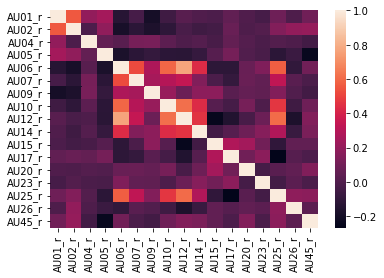

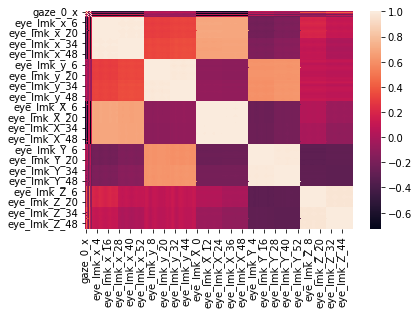

In [23]:
df_AUR = df.iloc[:, 680:697]
df_eye = df.iloc[:, 6:294]
df_xy = df.iloc[:, 300:436]
df_XYZ = df.iloc[:, 436:640]
df_p_scale = df.iloc[:, 640:680]


corr_AUs = df_AUR.corr()
corr_eye = df_eye.corr()
corr_xy = df_xy.corr()
corr_XYZ = df_XYZ.corr()
corr_p_scale = df_p_scale.corr()

sns.heatmap(corr_AUs)
plt.show()
sns.heatmap(corr_eye)
plt.show()

In [25]:
columns = np.full((corr_AUs.shape[0],), True, dtype=bool)
for i in range(corr_AUs.shape[0]):
    for j in range(i+1, corr_AUs.shape[0]):
        if corr_AUs.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_AUR.columns[columns]
df_AUR_new = df_AUR[selected_columns]

columns = np.full((corr_eye.shape[0],), True, dtype=bool)
for i in range(corr_eye.shape[0]):
    for j in range(i+1, corr_eye.shape[0]):
        if corr_eye.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df_eye.columns[columns]
df_eye_new = df_eye[selected_columns]


columns = np.full((corr_xy.shape[0],), True, dtype=bool)
for i in range(corr_xy.shape[0]):
    for j in range(i+1, corr_xy.shape[0]):
        if corr_xy.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df_xy.columns[columns]
df_xy_new = df_xy[selected_columns]

columns = np.full((corr_XYZ.shape[0],), True, dtype=bool)
for i in range(corr_XYZ.shape[0]):
    for j in range(i+1, corr_XYZ.shape[0]):
        if corr_XYZ.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df_XYZ.columns[columns]
df_XYZ_new = df_XYZ[selected_columns]


columns = np.full((corr_p_scale.shape[0],), True, dtype=bool)
for i in range(corr_p_scale.shape[0]):
    for j in range(i+1, corr_p_scale.shape[0]):
        if corr_p_scale.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df_p_scale.columns[columns]
df_p_scale_new = df_p_scale[selected_columns]



delete_columns1 = df.columns[680:697]
delete_columns2 = df.columns[6:294]
delete_columns3 = df.columns[300:436]
delete_columns4 = df.columns[436:640]
delete_columns5 = df.columns[640:680]


df_data_drop = df.drop(columns = delete_columns1)
df_data_drop = df_data_drop.drop(columns=delete_columns2)
df_data_drop = df_data_drop.drop(columns=delete_columns3)
df_data_drop = df_data_drop.drop(columns=delete_columns4)
df_data_drop = df_data_drop.drop(columns=delete_columns5)


cleaned_data = pd.concat([df_data_drop, df_eye_new, df_AUR_new, df_xy_new, df_XYZ_new, df_p_scale_new], axis=1)
cleaned_data.to_csv('training_dataset.csv')
cleaned_data

file_name  isClipLong  frame  face_id  timestamp  success  \
0            2women.mp4        True      1        0      0.000        1   
1            2women.mp4        True      1        1      0.000        1   
2            2women.mp4        True      2        0      0.100        1   
3            2women.mp4        True      2        1      0.100        1   
4            2women.mp4        True      3        0      0.200        1   
...                 ...         ...    ...      ...        ...      ...   
111546  wez-anna-th.mp4        True    415        0      6.900        1   
111547  wez-anna-th.mp4        True    416        0      6.917        1   
111548  wez-anna-th.mp4        True    417        0      6.933        1   
111549  wez-anna-th.mp4        True    418        0      6.950        1   
111550  wez-anna-th.mp4        True    419        0      6.967        1   

        pose_Tx  pose_Ty  pose_Tz  pose_Rx  ...   p_24   p_25   p_26   p_27  \
0          39.8   -430.6   1131.3    0.422  ...  0.204 -0.023  0.135  0.005   
1         -11.1    222.6   1160.0   -0.052  ... -0.006 -0.113  0.126 -0.007   
2          38.0   -430.3   1129.6    0.406  ...  0.256 -0.209  0.208 -0.034   
3         -11.0    222.1   1152.0   -0.049  ... -0.010 -0.230  0.196  0.002   
4          30.0   -422.8   1107.0    0.374  ...  0.199  0.037  0.208 -0.053   
...         ...      ...      ...      ...  ...    ...    ...    ...    ...   
111546     32.5      6.6    479.5    0.264  ... -2.569 -0.840 -2.178  0.818   
111547     32.1      6.3    479.4    0.248  ... -3.109 -0.476 -2.507  0.480   
111548     32.1      6.2    480.3    0.249  ... -3.428 -0.488 -2.627  0.482   
111549     31.8      5.8    479.4    0.244  ... -3.673 -0.439 -2.546  0.613   
111550     31.8      5.9    479.3    0.245  ... -3.595 -0.721 -2.531  0.616   

         p_28   p_29   p_30   p_31   p_32   p_33  
0       0.000 -0.024 -0.012 -0.019  0.007  0.013  
1      -0.014 -0.003  0.007  0.003 -0.001  0.003  
2      -0.022 -0.035 -0.018 -0.032  0.030  0.014  
3      -0.052 -0.003 -0.015  0.019  0.013 -0.008  
4      -0.001 -0.021 -0.026 -0.045  0.017  0.012  
...       ...    ...    ...    ...    ...    ...  
111546  0.764  0.084  0.635 -1.318 -0.266  1.407  
111547  0.948  0.306  0.573 -1.367 -0.244  1.459  
111548  1.015  0.276  0.534 -1.389 -0.278  1.459  
111549  0.971  0.174  0.541 -1.396 -0.342  1.486  
111550  0.958  0.120  0.571 -1.376 -0.318  1.465  

[93294 rows x 105 columns]

## **Training the Random Forest Model**


In [42]:
fullDf = pd.read_csv('training_dataset.csv')

# too many non-flirting samples so removing some here /TODO - delete this section
fullDf = fullDf.drop(fullDf[fullDf.file_name == 'GeniusBrain_w_David_So.mp4'].index)
fullDf = fullDf.drop(fullDf[fullDf.file_name == 'Abroad_In_Japan.mp4'].index)
fullDf = fullDf.drop(fullDf[fullDf.file_name == 'Girl_Talk_W_PODCAST.mp4'].index)
df = fullDf.drop(fullDf[fullDf.file_name == 'REAL_Ex-Yakuza_Member_in_Japan.mp4'].index)
df

Unnamed: 0                file_name  isClipLong  frame  face_id  \
0               0               2women.mp4        True      1        0   
1               1               2women.mp4        True      1        1   
2               2               2women.mp4        True      2        0   
3               3               2women.mp4        True      2        1   
4               4               2women.mp4        True      3        0   
...           ...                      ...         ...    ...      ...   
92876      111111  wataru-talking-libj.mp4       False    265        0   
92877      111112  wataru-talking-libj.mp4       False    266        0   
92878      111113  wataru-talking-libj.mp4       False    267        0   
92879      111114  wataru-talking-libj.mp4       False    268        0   
92880      111115  wataru-talking-libj.mp4       False    269        0   

       timestamp  success  pose_Tx  pose_Ty  pose_Tz  ...   p_24   p_25  \
0          0.000        1     39.8   -430.6   1131.3  ...  0.204 -0.023   
1          0.000        1    -11.1    222.6   1160.0  ... -0.006 -0.113   
2          0.100        1     38.0   -430.3   1129.6  ...  0.256 -0.209   
3          0.100        1    -11.0    222.1   1152.0  ... -0.010 -0.230   
4          0.200        1     30.0   -422.8   1107.0  ...  0.199  0.037   
...          ...      ...      ...      ...      ...  ...    ...    ...   
92876      4.400        1    152.7   -166.1   1158.4  ... -0.188  2.408   
92877      4.417        1    152.3   -165.9   1157.0  ... -0.206  2.379   
92878      4.433        1    152.2   -166.0   1157.6  ... -0.272  2.413   
92879      4.450        1    152.2   -166.0   1157.2  ... -0.178  2.401   
92880      4.467        1    152.1   -166.0   1157.1  ... -0.242  2.435   

        p_26   p_27   p_28   p_29   p_30   p_31   p_32   p_33  
0      0.135  0.005  0.000 -0.024 -0.012 -0.019  0.007  0.013  
1      0.126 -0.007 -0.014 -0.003  0.007  0.003 -0.001  0.003  
2      0.208 -0.034 -0.022 -0.035 -0.018 -0.032  0.030  0.014  
3      0.196  0.002 -0.052 -0.003 -0.015  0.019  0.013 -0.008  
4      0.208 -0.053 -0.001 -0.021 -0.026 -0.045  0.017  0.012  
...      ...    ...    ...    ...    ...    ...    ...    ...  
92876  0.279 -0.887 -0.121 -0.631  0.635  0.181  0.172  0.351  
92877  0.234 -0.835 -0.160 -0.624  0.626  0.181  0.157  0.371  
92878  0.274 -0.894 -0.132 -0.632  0.628  0.169  0.179  0.369  
92879  0.260 -0.867 -0.134 -0.634  0.636  0.163  0.174  0.373  
92880  0.257 -0.875 -0.142 -0.633  0.635  0.167  0.174  0.375  

[39696 rows x 106 columns]